# Installing packages


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import csv
import itertools

# Reading data into a datframe and creating an empty dicitionary to store results

In [105]:
merits={}
train=pd.read_csv('/Users/MAHE/Desktop/programming/machinelearning/basketball/shot_logs.csv')

# Filtering data by dropping all N/A values and subsetting entries only for players- Steph Curry and Klay Thompson

In [106]:
train.dropna()
train= train[(train['player_name']=='stephen curry') | (train['player_name']=='klay thompson')]
curry_data = train[(train['player_name']=='stephen curry')]
klay_data = train[(train['player_name']=='klay thompson')]
plot_make_curry = curry_data[curry_data['FGM']==1]
plot_miss_curry = curry_data[curry_data['FGM']==0]
plot_make_klay = klay_data[klay_data['FGM']==1]
plot_miss_klay = klay_data[klay_data['FGM']==0]

## To determine better shooter overall

In [107]:
count_makes_curry=len(curry_data[curry_data['FGM']==1])
count_misses_curry=len(curry_data[curry_data['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys field goal pecentage is ",fgm_percentage_curry)
count_makes_klay=len(klay_data[klay_data['FGM']==1])
count_misses_klay=len(klay_data[klay_data['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays field goal pecentage is ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['Overall shooter:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['Overall shooter:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]

Currys field goal pecentage is  48.553719008264466
Klays field goal pecentage is  46.240988671472714


# Shooting stats based on Shot clock

The NBA Standards specify 24 seconds per possesion, we take the average shot clock used by both the players to set the mean line and then observe the players perfomance above and below the mean line

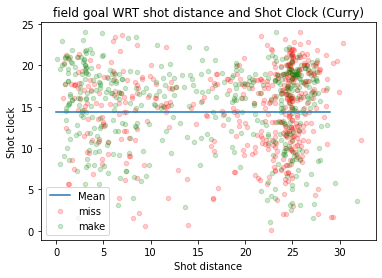

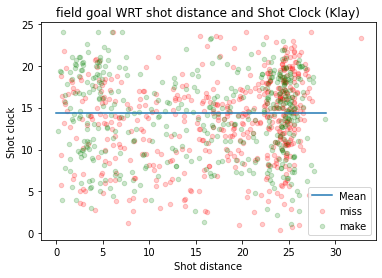

In [108]:
c_shotclk=curry_data['SHOT_CLOCK'].mean()
k_shotclk=klay_data['SHOT_CLOCK'].mean()
avg_shotclk=(c_shotclk+k_shotclk)/2

avg=[avg_shotclk]*30
avgx=list(range(0, 30))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


plt.title('field goal WRT shot distance and Shot Clock (Curry)')
ax.scatter(plot_miss_curry['SHOT_DIST'],plot_miss_curry['SHOT_CLOCK'],color='red',label="miss",alpha=0.2,s=20)
ax.scatter(plot_make_curry['SHOT_DIST'],plot_make_curry['SHOT_CLOCK'],color='green',label="make",alpha=0.2,s=20)
ax.plot(avgx,avg, label='Mean')
plt.xlabel('Shot distance')
plt.ylabel('Shot clock')
ax.legend()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(plot_miss_klay['SHOT_DIST'],plot_miss_klay['SHOT_CLOCK'],color='red',label="miss",alpha=0.2,s=20)
ax.scatter(plot_make_klay['SHOT_DIST'],plot_make_klay['SHOT_CLOCK'],color='green',label="make",alpha=0.2,s=20)
ax.plot(avgx,avg, label='Mean')
plt.title('field goal WRT shot distance and Shot Clock (Klay)')
plt.xlabel('Shot distance')
plt.ylabel('Shot clock')
ax.legend()
plt.show()

Graphical Inference:
The trend is almost identical around the 25 ft mark
we can observe Curry takes less Mid Range shots when the shot clock is running out
so we can conclude Klay is a realtively confident midrange shooter as the shot clock goes below 14

## Early Possesion shooter
Using data above the mean line

In [109]:
curry_data_3pt=curry_data[curry_data['SHOT_CLOCK']>=avg_shotclk]
count_makes_curry=len(curry_data_3pt[curry_data_3pt['FGM']==1])
count_misses_curry=len(curry_data_3pt[curry_data_3pt['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys early shot pecentage is ",fgm_percentage_curry)
klay_data_3pt=klay_data[klay_data['SHOT_CLOCK']>=avg_shotclk]
count_makes_klay=len(klay_data_3pt[klay_data_3pt['FGM']==1])
count_misses_klay=len(klay_data_3pt[klay_data_3pt['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays early shot pecentage is ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['early possesion shooter:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['early possesion shooter:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]


Currys early shot pecentage is  51.6295025728988
Klays early shot pecentage is  47.96573875802998


## Late possesion shooter
using data below the mean line 

In [110]:
curry_data_3pt=curry_data[curry_data['SHOT_CLOCK']<=(avg_shotclk)]
count_makes_curry=len(curry_data_3pt[curry_data_3pt['FGM']==1])
count_misses_curry=len(curry_data_3pt[curry_data_3pt['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys late shot pecentage is ",fgm_percentage_curry)
klay_data_3pt=klay_data[klay_data['SHOT_CLOCK']<=(avg_shotclk)]
count_makes_klay=len(klay_data_3pt[klay_data_3pt['FGM']==1])
count_misses_klay=len(klay_data_3pt[klay_data_3pt['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays late shot pecentage is ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['late possesion shooter:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['late possesion shooter:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]


Currys late shot pecentage is  45.530726256983236
Klays late shot pecentage is  44.8559670781893


# Shooting stats based on Touch Time
Touch time the sum of time that the player had possesion of the ball before taking that specific shot 
we calculate average touch time and analyze the perfomance 

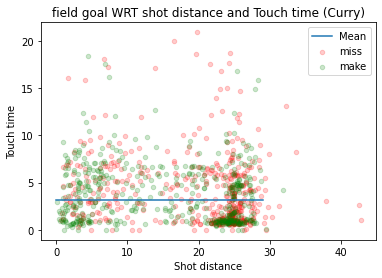

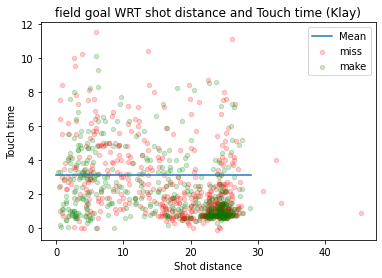

In [111]:
c_touchtime=curry_data['TOUCH_TIME'].mean()
k_touchtime=klay_data['TOUCH_TIME'].mean()
avg_touchtime=(c_touchtime+k_touchtime)/2
avg=[avg_touchtime]*30
avgx=list(range(0, 30))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


plt.title('field goal WRT shot distance and Touch time (Curry)')
ax.scatter(plot_miss_curry['SHOT_DIST'],plot_miss_curry['TOUCH_TIME'],color='red',label="miss",alpha=0.2,s=20)
ax.scatter(plot_make_curry['SHOT_DIST'],plot_make_curry['TOUCH_TIME'],color='green',label="make",alpha=0.2,s=20)
ax.plot(avgx,avg, label='Mean')
plt.xlabel('Shot distance')
plt.ylabel('Touch time')
ax.legend()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(plot_miss_klay['SHOT_DIST'],plot_miss_klay['TOUCH_TIME'],color='red',label="miss",alpha=0.2,s=20)
ax.scatter(plot_make_klay['SHOT_DIST'],plot_make_klay['TOUCH_TIME'],color='green',label="make",alpha=0.2,s=20)
ax.plot(avgx,avg, label='Mean')
plt.title('field goal WRT shot distance and Touch time (Klay)')
plt.xlabel('Shot distance')
plt.ylabel('Touch time')
ax.legend()
plt.show()

Graphical Inference:
We can see both curry and Klay are dominating the catch and shoot game here

In [112]:
c_touchtime=curry_data['TOUCH_TIME'].mean()
k_touchtime=klay_data['TOUCH_TIME'].mean()
avg_touchtime=(c_touchtime+k_touchtime)/2
curry_data_3pt=curry_data[curry_data['TOUCH_TIME']<=avg_touchtime]
count_makes_curry=len(curry_data_3pt[curry_data_3pt['FGM']==1])
count_misses_curry=len(curry_data_3pt[curry_data_3pt['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys percentage with less than average touch time ",fgm_percentage_curry)
klay_data_3pt=klay_data[klay_data['TOUCH_TIME']<=avg_touchtime]
count_makes_klay=len(klay_data_3pt[klay_data_3pt['FGM']==1])
count_misses_klay=len(klay_data_3pt[klay_data_3pt['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays percentage with less than average touch time ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['shooter with less touch time:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['shooter with less touch time:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]

Currys percentage with less than average touch time  47.26166328600406
Klays percentage with less than average touch time  46.796657381615596


# Shooting Stats based on Number of dribbles

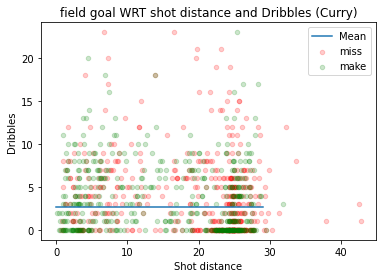

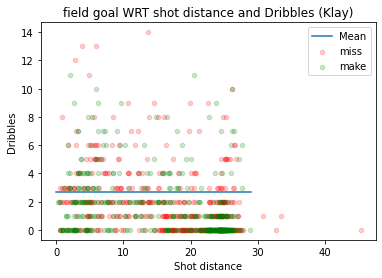

In [113]:
c_touchtime=curry_data['DRIBBLES'].mean()
k_touchtime=klay_data['DRIBBLES'].mean()
avg_touchtime=(c_touchtime+k_touchtime)/2
avg=[avg_touchtime]*30
avgx=list(range(0, 30))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


plt.title('field goal WRT shot distance and Dribbles (Curry)')
ax.scatter(plot_miss_curry['SHOT_DIST'],plot_miss_curry['DRIBBLES'],color='red',label="miss",alpha=0.2,s=20)
ax.scatter(plot_make_curry['SHOT_DIST'],plot_make_curry['DRIBBLES'],color='green',label="make",alpha=0.2,s=20)
ax.plot(avgx,avg, label='Mean')
plt.xlabel('Shot distance')
plt.ylabel('Dribbles')
ax.legend()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(plot_miss_klay['SHOT_DIST'],plot_miss_klay['DRIBBLES'],color='red',label="miss",alpha=0.2,s=20)
ax.scatter(plot_make_klay['SHOT_DIST'],plot_make_klay['DRIBBLES'],color='green',label="make",alpha=0.2,s=20)
ax.plot(avgx,avg, label='Mean')
plt.title('field goal WRT shot distance and Dribbles (Klay)')
plt.xlabel('Shot distance')
plt.ylabel('Dribbles')
ax.legend()
plt.show()

Graphical Inference:
We can observe how Curry is a cold blodded off the dribble 3 point shooter

We can observe how both these players doinate the Catch and shoot Game

We can observe the brillian off ball movement as Klay has a grreat record of scoring without the ball 

In [114]:
c_touchtime=curry_data['DRIBBLES'].mean()
k_touchtime=klay_data['DRIBBLES'].mean()
avg_touchtime=(c_touchtime+k_touchtime)/2
print(avg_touchtime)
curry_data_3pt=curry_data[curry_data['DRIBBLES']<=avg_touchtime]
count_makes_curry=len(curry_data_3pt[curry_data_3pt['FGM']==1])
count_misses_curry=len(curry_data_3pt[curry_data_3pt['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys percentage with less than average dribbles ",fgm_percentage_curry)
klay_data_3pt=klay_data[klay_data['DRIBBLES']<=avg_touchtime]
count_makes_klay=len(klay_data_3pt[klay_data_3pt['FGM']==1])
count_misses_klay=len(klay_data_3pt[klay_data_3pt['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays percentage with less than average dribbles ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['shooter with less dribbles:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['shooter with less dribbles:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]

2.6545320492633477
Currys percentage with less than average dribbles  47.84394250513347
Klays percentage with less than average dribbles  46.666666666666664


# Shooting stats based on early form
In this section we analyze who takes more time to get into their shooting form i.e number of shots taken before reaching their consistent form 


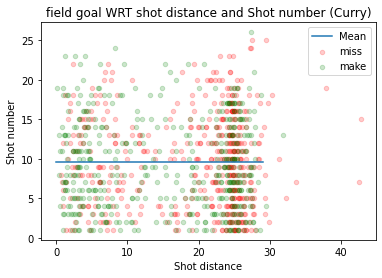

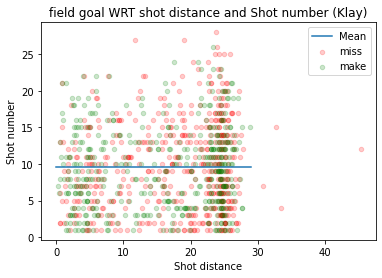

In [115]:
c_touchtime=curry_data['SHOT_NUMBER'].mean()
k_touchtime=klay_data['SHOT_NUMBER'].mean()
avg_touchtime=(c_touchtime+k_touchtime)/2
avg=[avg_touchtime]*30
avgx=list(range(0, 30))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


plt.title('field goal WRT shot distance and Shot number (Curry)')
ax.scatter(plot_miss_curry['SHOT_DIST'],plot_miss_curry['SHOT_NUMBER'],color='red',label="miss",alpha=0.2,s=20)
ax.scatter(plot_make_curry['SHOT_DIST'],plot_make_curry['SHOT_NUMBER'],color='green',label="make",alpha=0.2,s=20)
ax.plot(avgx,avg, label='Mean')
plt.xlabel('Shot distance')
plt.ylabel('Shot number')
ax.legend()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(plot_miss_klay['SHOT_DIST'],plot_miss_klay['SHOT_NUMBER'],color='red',label="miss",alpha=0.2,s=20)
ax.scatter(plot_make_klay['SHOT_DIST'],plot_make_klay['SHOT_NUMBER'],color='green',label="make",alpha=0.2,s=20)
ax.plot(avgx,avg, label='Mean')
plt.title('field goal WRT shot distance and Shot number (Klay)')
plt.xlabel('Shot distance')
plt.ylabel('Shot number')
ax.legend()
plt.show()

In [116]:
c_touchtime=curry_data['SHOT_NUMBER'].mean()
k_touchtime=klay_data['SHOT_NUMBER'].mean()
avg_touchtime=(c_touchtime+k_touchtime)/2
print(avg_touchtime)
curry_data_3pt=curry_data[curry_data['SHOT_NUMBER']<=avg_touchtime]
count_makes_curry=len(curry_data_3pt[curry_data_3pt['FGM']==1])
count_misses_curry=len(curry_data_3pt[curry_data_3pt['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys percentage with less than average number of shots ",fgm_percentage_curry)
klay_data_3pt=klay_data[klay_data['SHOT_NUMBER']<=avg_touchtime]
count_makes_klay=len(klay_data_3pt[klay_data_3pt['FGM']==1])
count_misses_klay=len(klay_data_3pt[klay_data_3pt['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays percentage with less than average number of shots ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['shooter with less shots:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['shooter with less shots:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]

9.551215093070958
Currys percentage with less than average number of shots  51.46771037181996
Klays percentage with less than average number of shots  46.8503937007874


# Shooting stats Based on Closest defender

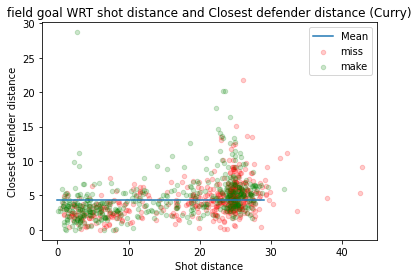

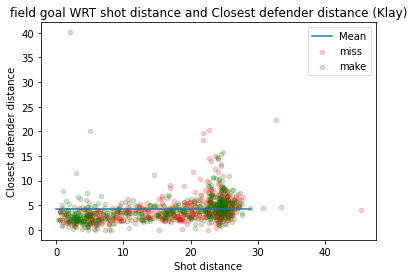

In [117]:
c_touchtime=curry_data['CLOSE_DEF_DIST'].mean()
k_touchtime=klay_data['CLOSE_DEF_DIST'].mean()
avg_touchtime=(c_touchtime+k_touchtime)/2
avg=[avg_touchtime]*30
avgx=list(range(0, 30))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


plt.title('field goal WRT shot distance and Closest defender distance (Curry)')
ax.scatter(plot_miss_curry['SHOT_DIST'],plot_miss_curry['CLOSE_DEF_DIST'],color='red',label="miss",alpha=0.2,s=20)
ax.scatter(plot_make_curry['SHOT_DIST'],plot_make_curry['CLOSE_DEF_DIST'],color='green',label="make",alpha=0.2,s=20)
ax.plot(avgx,avg, label='Mean')
plt.xlabel('Shot distance')
plt.ylabel('Closest defender distance')
ax.legend()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(plot_miss_klay['SHOT_DIST'],plot_miss_klay['CLOSE_DEF_DIST'],color='red',label="miss",alpha=0.2,s=20)
ax.scatter(plot_make_klay['SHOT_DIST'],plot_make_klay['CLOSE_DEF_DIST'],color='green',label="make",alpha=0.2,s=20)
ax.plot(avgx,avg, label='Mean')
plt.title('field goal WRT shot distance and Closest defender distance (Klay)')
plt.xlabel('Shot distance')
plt.ylabel('Closest defender distance')
ax.legend()
plt.show()

Graphical Inference:
Both players have similar trends
We can observe that Curry takes very few mid range shots while guarded closely and has converted most of those
 

In [118]:


curry_data_3pt=curry_data[curry_data['CLOSE_DEF_DIST']<=avg_touchtime]
count_makes_curry=len(curry_data_3pt[curry_data_3pt['FGM']==1])
count_misses_curry=len(curry_data_3pt[curry_data_3pt['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys percentage while guarded closely ",fgm_percentage_curry)
klay_data_3pt=klay_data[klay_data['CLOSE_DEF_DIST']<=avg_touchtime]
count_makes_klay=len(klay_data_3pt[klay_data_3pt['FGM']==1])
count_misses_klay=len(klay_data_3pt[klay_data_3pt['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays percentage while guarded closely ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['shot maker with tight defense:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['shotmaker with tight defense:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]


Currys percentage while guarded closely  48.96421845574388
Klays percentage while guarded closely  45.05672609400324


# Some Boring calculations 
## 2 point shooting statistics
## 3 point  shooting statisctics
## 1st quater shooting statistics
## 2nd quater shooting statistics
## 3rd quater shooting statistics
## 4th quater shooting statistics


In [119]:
# 2pt shooter
curry_data_2pt=curry_data[curry_data['PTS_TYPE']==2]
count_makes_curry=len(curry_data_2pt[curry_data_2pt['FGM']==1])
count_misses_curry=len(curry_data_2pt[curry_data_2pt['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys 2pt pecentage is ",fgm_percentage_curry)
klay_data_2pt=klay_data[klay_data['PTS_TYPE']==2]
count_makes_klay=len(klay_data_2pt[klay_data_2pt['FGM']==1])
count_misses_klay=len(klay_data_2pt[klay_data_2pt['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays 2 pt pecentage is ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['2pt shooter:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['2pt shooter:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]


#3pt shooter
curry_data_3pt=curry_data[curry_data['PTS_TYPE']==3]
count_makes_curry=len(curry_data_3pt[curry_data_3pt['FGM']==1])
count_misses_curry=len(curry_data_3pt[curry_data_3pt['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys 3pt pecentage is ",fgm_percentage_curry)
klay_data_3pt=klay_data[klay_data['PTS_TYPE']==3]
count_makes_klay=len(klay_data_3pt[klay_data_3pt['FGM']==1])
count_misses_klay=len(klay_data_3pt[klay_data_3pt['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays 3 pt pecentage is ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['3pt shooter:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['3pt shooter:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]


#first quater shooter
curry_data_3pt=curry_data[curry_data['PERIOD']==1]
count_makes_curry=len(curry_data_3pt[curry_data_3pt['FGM']==1])
count_misses_curry=len(curry_data_3pt[curry_data_3pt['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys fgm percentage in first quater ",fgm_percentage_curry)
klay_data_3pt=klay_data[klay_data['PERIOD']==1]
count_makes_klay=len(klay_data_3pt[klay_data_3pt['FGM']==1])
count_misses_klay=len(klay_data_3pt[klay_data_3pt['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays fgm percentage in first quater ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['1st quater shooter:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['1st quater shooter:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]

# second quater shooter
curry_data_3pt=curry_data[curry_data['PERIOD']==2]
count_makes_curry=len(curry_data_3pt[curry_data_3pt['FGM']==1])
count_misses_curry=len(curry_data_3pt[curry_data_3pt['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys fgm percentage in second quater ",fgm_percentage_curry)
klay_data_3pt=klay_data[klay_data['PERIOD']==2]
count_makes_klay=len(klay_data_3pt[klay_data_3pt['FGM']==1])
count_misses_klay=len(klay_data_3pt[klay_data_3pt['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays fgm percentage in second quater ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['2nd quater shooter:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['2nd quater shooter:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]


#3rd quater shooter
curry_data_3pt=curry_data[curry_data['PERIOD']==3]
count_makes_curry=len(curry_data_3pt[curry_data_3pt['FGM']==1])
count_misses_curry=len(curry_data_3pt[curry_data_3pt['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys fgm percentage in third quater ",fgm_percentage_curry)
klay_data_3pt=klay_data[klay_data['PERIOD']==3]
count_makes_klay=len(klay_data_3pt[klay_data_3pt['FGM']==1])
count_misses_klay=len(klay_data_3pt[klay_data_3pt['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays fgm percentage in third quater ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['3rd quater shooter:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['3rd quater shooter:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]


#4th quater shooting
curry_data_3pt=curry_data[curry_data['PERIOD']==4]
count_makes_curry=len(curry_data_3pt[curry_data_3pt['FGM']==1])
count_misses_curry=len(curry_data_3pt[curry_data_3pt['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys fgm percentage in fourth quater ",fgm_percentage_curry)
klay_data_3pt=klay_data[klay_data['PERIOD']==4]
count_makes_klay=len(klay_data_3pt[klay_data_3pt['FGM']==1])
count_misses_klay=len(klay_data_3pt[klay_data_3pt['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays fgm percentage in fourth quater ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['4th quater shooter:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['4th quater shooter:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]

Currys 2pt pecentage is  54.6875
Klays 2 pt pecentage is  48.226950354609926
Currys 3pt pecentage is  41.66666666666667
Klays 3 pt pecentage is  43.48894348894349
Currys fgm percentage in first quater  51.410658307210035
Klays fgm percentage in first quater  44.21052631578947
Currys fgm percentage in second quater  48.87640449438202
Klays fgm percentage in second quater  53.24074074074075
Currys fgm percentage in third quater  47.686832740213525
Klays fgm percentage in third quater  47.94520547945205
Currys fgm percentage in fourth quater  44.02173913043478
Klays fgm percentage in fourth quater  38.857142857142854


In [120]:
print('category:                                 best choice')
for name, age in merits.items():
    print('{} {}'.format(name, age))


category:                                 best choice
Overall shooter: ['Stephen Curry', 48.553719008264466, 46.240988671472714]
early possesion shooter: ['Stephen Curry', 51.6295025728988, 47.96573875802998]
late possesion shooter: ['Stephen Curry', 45.530726256983236, 44.8559670781893]
shooter with less touch time: ['Stephen Curry', 47.26166328600406, 46.796657381615596]
shooter with less dribbles: ['Stephen Curry', 47.84394250513347, 46.666666666666664]
shooter with less shots: ['Stephen Curry', 51.46771037181996, 46.8503937007874]
shot maker with tight defense: ['Stephen Curry', 48.96421845574388, 45.05672609400324]
2pt shooter: ['Stephen Curry', 54.6875, 48.226950354609926]
3pt shooter: ['Klay Thompson', 41.66666666666667, 43.48894348894349]
1st quater shooter: ['Stephen Curry', 51.410658307210035, 44.21052631578947]
2nd quater shooter: ['Klay Thompson', 48.87640449438202, 53.24074074074075]
3rd quater shooter: ['Klay Thompson', 47.686832740213525, 47.94520547945205]
4th quater sh

categories    Best choice  Currys percentage  \
0                   Overall  Stephen Curry          48.553719   
1                       2pt  Stephen Curry          54.687500   
2                       3pt  Klay Thompson          41.666667   
3           early possesion  Stephen Curry          51.629503   
4            late possesion  Stephen Curry          45.530726   
5           less touch time  Stephen Curry          47.261663   
6             tight defense  Stephen Curry          48.964218   
7                1st quater  Stephen Curry          51.410658   
8                2nd quater  Klay Thompson          48.876404   
9                3rd quater  Klay Thompson          47.686833   
10               4th quater  Stephen Curry          44.021739   
11            less dribbles  Stephen Curry          47.843943   
12  shooter with less shots  Stephen Curry          51.467710   

    Klays percentage  
0          46.240989  
1          48.226950  
2          43.488943  
3          47.

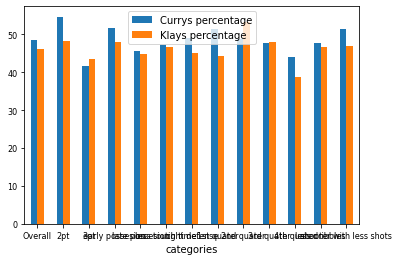

In [121]:
data={'categories':['Overall','2pt','3pt','early possesion','late possesion','less touch time','tight defense','1st quater','2nd quater','3rd quater','4th quater','less dribbles','shooter with less shots']

,'Best choice':[merits['Overall shooter:'][0],merits['2pt shooter:'][0],merits['3pt shooter:'][0],merits['early possesion shooter:'][0],merits['late possesion shooter:'][0],merits['shooter with less touch time:'][0],merits['shot maker with tight defense:'][0],merits['1st quater shooter:'][0],merits['2nd quater shooter:'][0],merits['3rd quater shooter:'][0],merits['4th quater shooter:'][0],merits['shooter with less dribbles:'][0],merits['shooter with less shots:'][0]],'Currys percentage':[merits['Overall shooter:'][1],merits['2pt shooter:'][1],merits['3pt shooter:'][1],merits['early possesion shooter:'][1],merits['late possesion shooter:'][1],merits['shooter with less touch time:'][1],merits['shot maker with tight defense:'][1],merits['1st quater shooter:'][1],merits['2nd quater shooter:'][1],merits['3rd quater shooter:'][1],merits['4th quater shooter:'][1],merits['shooter with less dribbles:'][1],merits['shooter with less shots:'][1]],'Klays percentage':[merits['Overall shooter:'][2],merits['2pt shooter:'][2],merits['3pt shooter:'][2],merits['early possesion shooter:'][2],merits['late possesion shooter:'][2],merits['shooter with less touch time:'][2],merits['shot maker with tight defense:'][2],merits['1st quater shooter:'][2],merits['2nd quater shooter:'][2],merits['3rd quater shooter:'][2],merits['4th quater shooter:'][2],merits['shooter with less dribbles:'][2],merits['shooter with less shots:'][2]],}
#print(data)
df = pd.DataFrame(data)
 
# Print the output.
print(df)

#ax = df[['Currys percentage','Klays percentage']].plot(kind='bar', title ="overall analysis", figsize=(15, 10), legend=True, fontsize=12)
ax = df.plot.bar(x='categories', y=['Currys percentage','Klays percentage'], rot=0,fontsize=8)

plt.show()